### Filtering: Smoothing an image, even out high frequency pixels, detect edges

In [ ]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

In [ ]:
im = Image.open("AmazonParrot.jpg")

In [ ]:
im.show()

In [ ]:
import scipy.misc
from scipy.misc.pilutil import Image

In [ ]:
# convert image to grayscale
im = im.convert('L')

In [ ]:
im.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


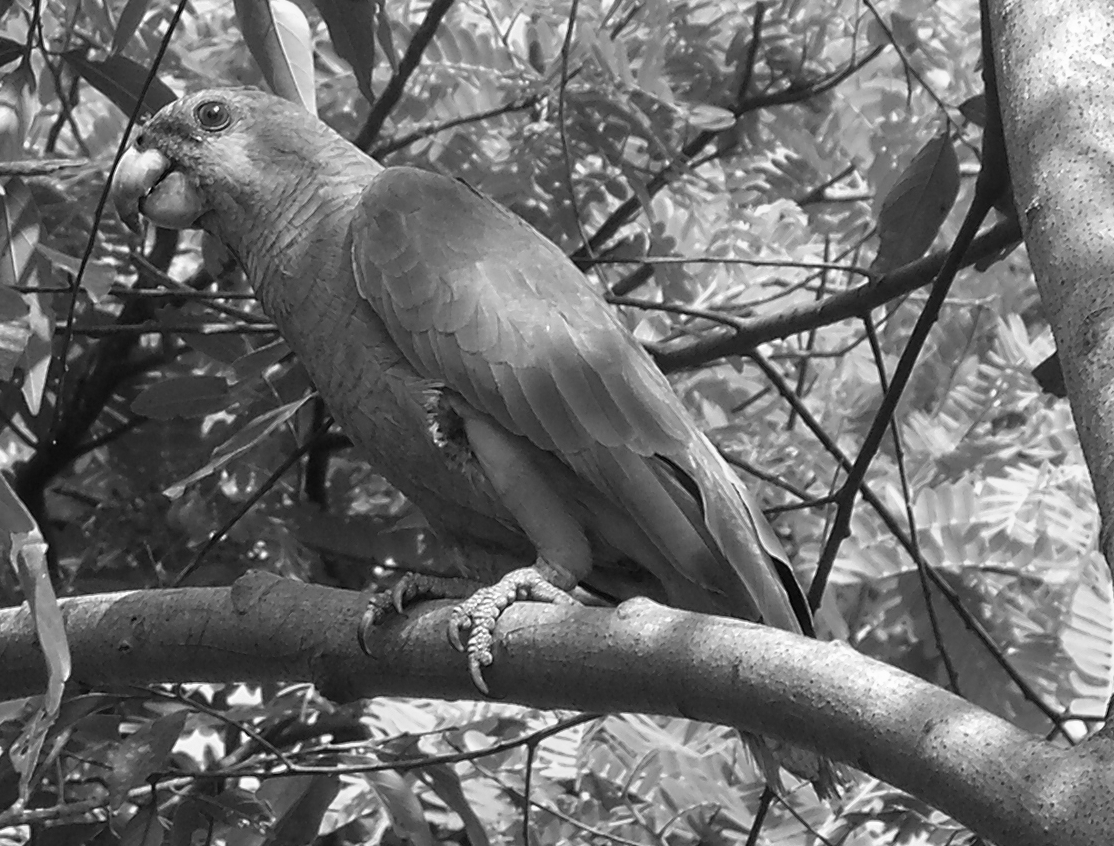

In [ ]:
# convert to numpy ndarray
im = scipy.misc.fromimage(im)
# perform some processing and convert back to image
c = scipy.misc.toimage(im)
c

#### # mean filter removes noise and brighten the image but blurs the edges and reduces the spatial resolution

In [ ]:
# 5 by 5 mean filter
k = np.ones((5,5)) / 25

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


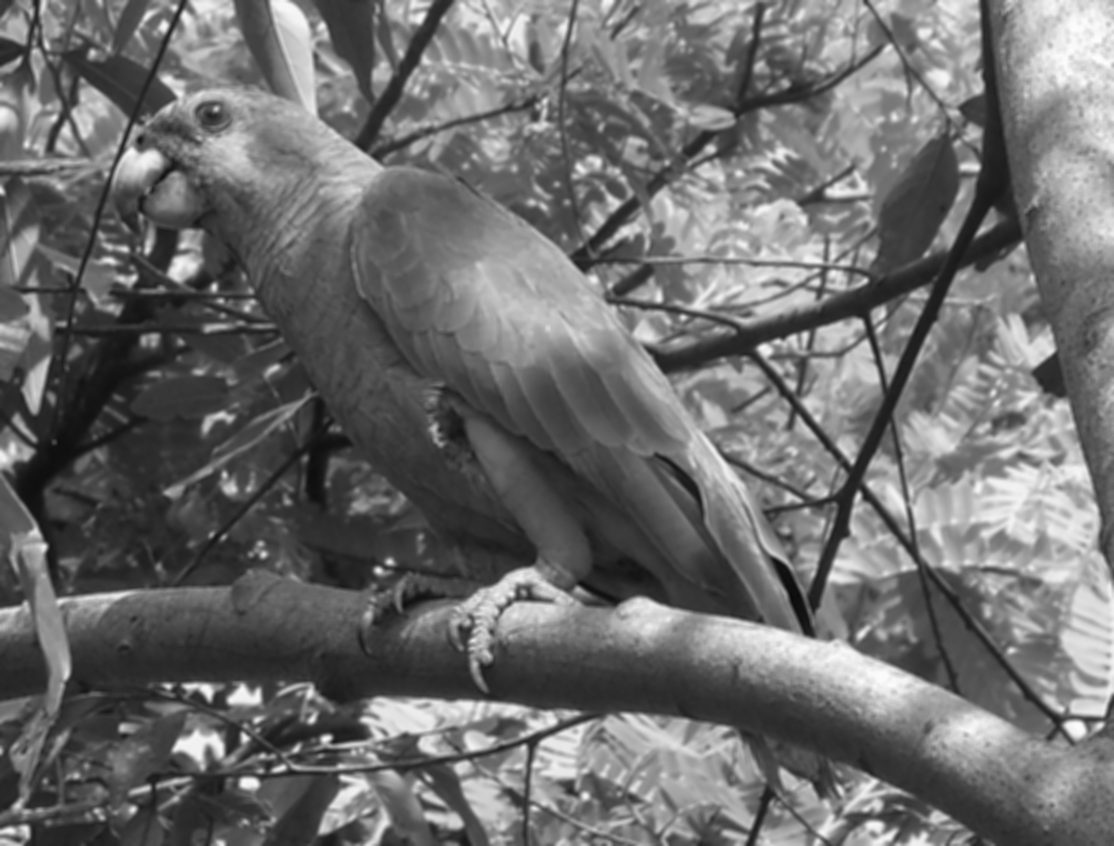

In [ ]:
# perform convolution
b = scipy.ndimage.filters.convolve(im,k)
# convert the ndarray to image
b = scipy.misc.toimage(b)
b


#### median filter: remove salt & pepper effect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


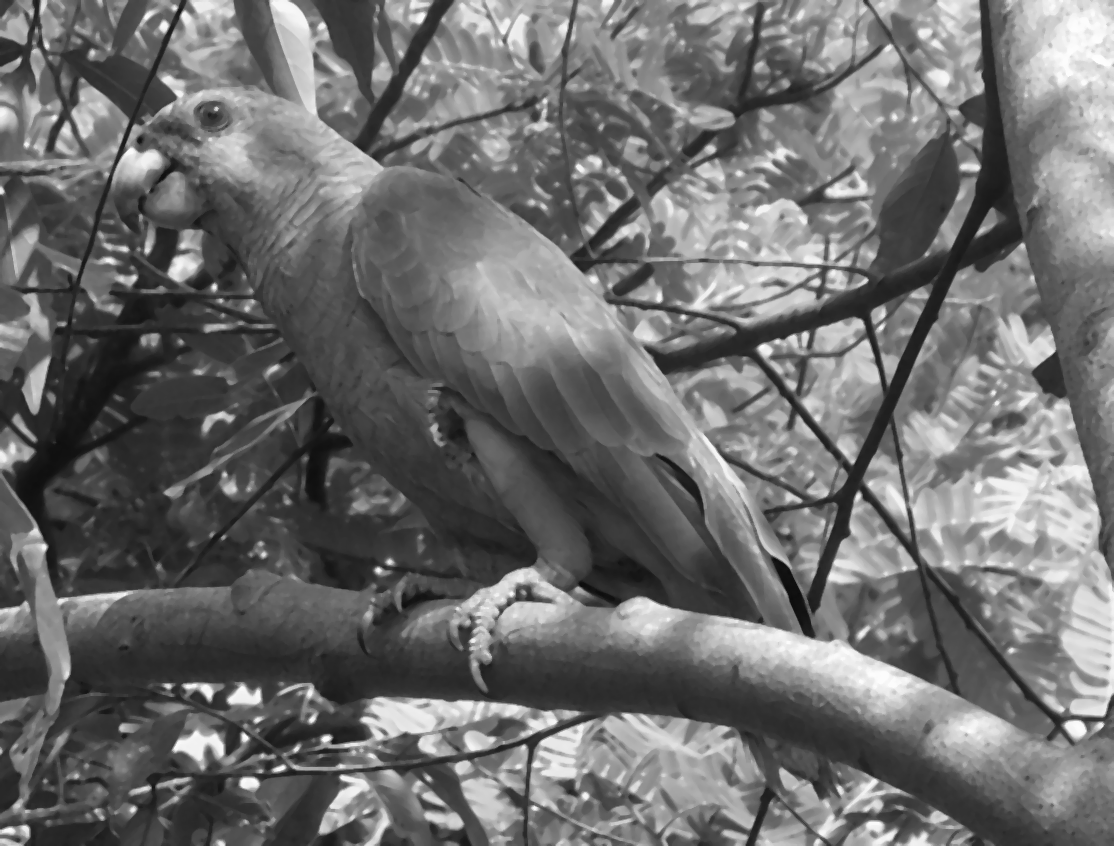

In [ ]:
b = scipy.ndimage.filters.median_filter(im, size=5, footprint=None, output=None,
                                       mode='reflect', cval=0.0, origin=0)
b = scipy.misc.toimage(b)
b

#### max filter: enhances the bright pixels in the image

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


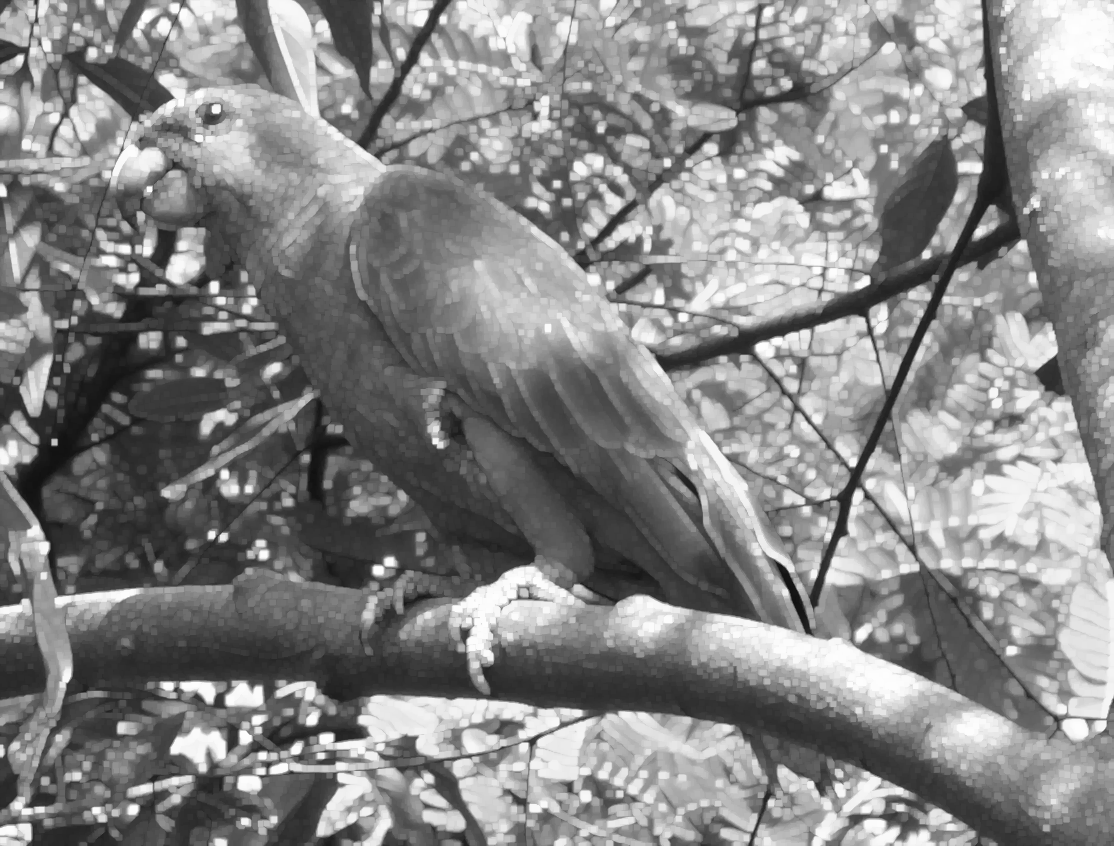

In [ ]:
b = scipy.ndimage.filters.maximum_filter(im, size=5, footprint=None, output=None,
                                       mode='reflect', cval=0.0, origin=0)
b = scipy.misc.toimage(b)
b

#### min filter: enhances the dark points in the image

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


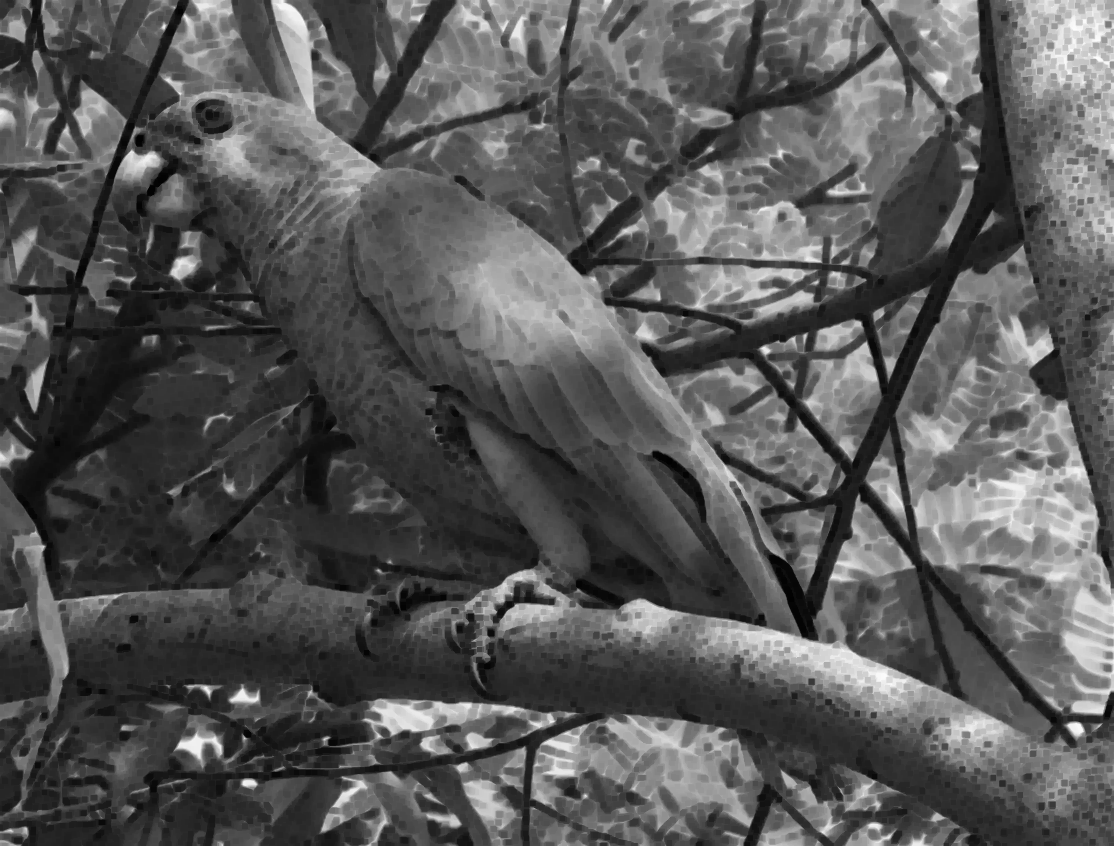

In [ ]:
b = scipy.ndimage.filters.minimum_filter(im, size=5,
        footprint=None,output=None,mode='reflect',cval=0.0,
        origin=0)
b = scipy.misc.toimage(b)
b

#### gaussian filter:  blur the image or to reduce noise.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


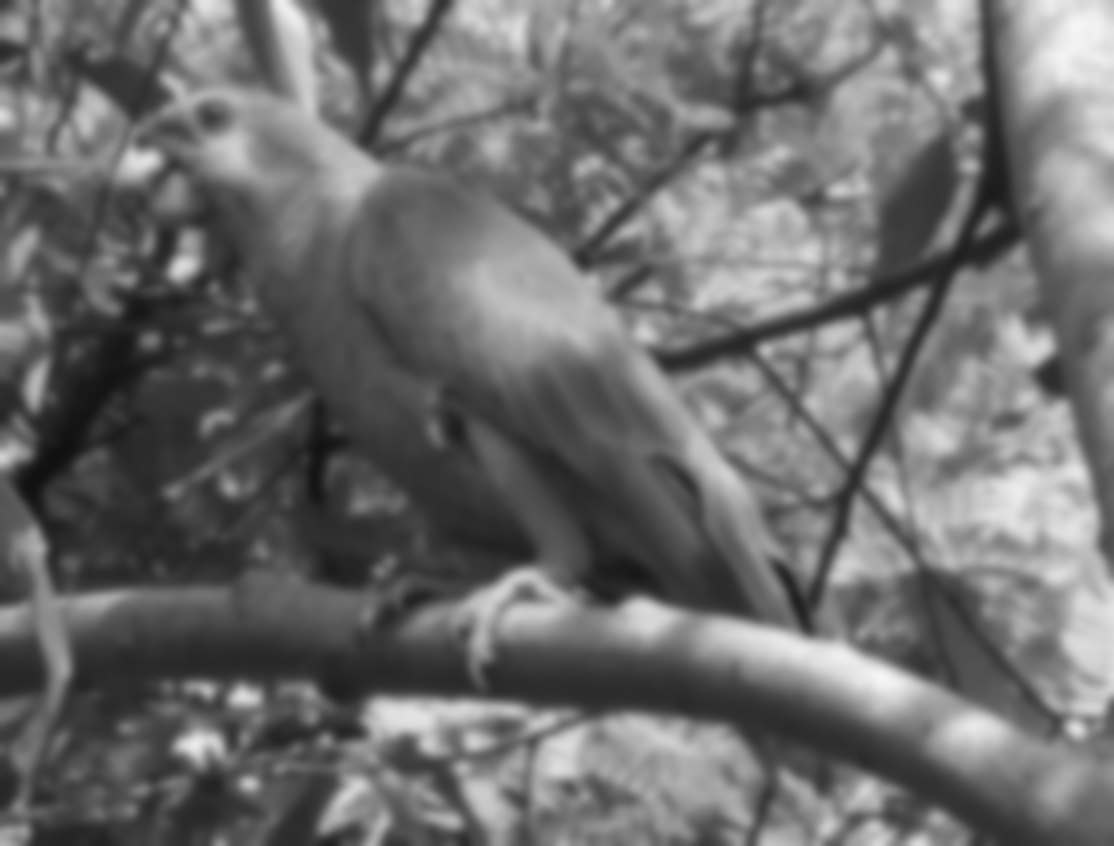

In [ ]:
b = scipy.ndimage.filters.gaussian_filter(im,
        sigma=5)
b = scipy.misc.toimage(b)
b

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [ ]:
base_model=VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling='avg')

In [ ]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________